* By: David Munoz Constantine
* Email: dmunoz.dmc@gmail.com
* Reference: __Toward a generic representation of random variables for machine learning__ _by_ Donnat, P., Marti, G. and Very, P.

-------
## Abstract

Being able to discriminate random variables on a time series on both distribution and dependence distributions, is motivated by the study of
financial assets returns. For example, if the returns of one asset are normally distributed, and the returns of another asset follow a heavy-tail
distribution, if these two returns are perfectly correlated, are they similar? The authors assert that they are not similar from a risk perspective.

Common methods to measure the similarity between random variables, such as $L_2$ distance, correlation distance, and the generic parametric representation (GPR),
are not able to fully distinguish multiple distributions in multiple time series.

The authors proposed a distance metric called the generic non-parametric representation (GNPR) that “improves the performance of machine learning
algorithms working on independent and identically distributed stochastic processes”. It can successfully discriminate multiple distributions from
multiple time series.

The authors provide a method to generate such time series to verify the clustering functionality of GNPR.

In [1]:
import matplotlib.pyplot as plt
from mlfinlab.data_generation.correlated_random_walks import generate_cluster_time_series
from mlfinlab.data_generation.data_verification import plot_time_series_dependencies
import numpy as np

np.random.seed(2814)

## Generic Non-Parametric Representation (GNPR) Distance

The authors introduce an non-parametric approach for representing random variables that splits apart dependency and distribution, without losing any information. It is called the generic non-parametric representaion (GNPR). 

This approach overcomes many shortcomings of other methods to measure similarity of random variables, such as $L_2$ distance, correlation distance, and the generic parametric representation (GPR). According to the authors, this approach "improves the performance of machine learning algorithms working on independent and identically distributed stochastic processes".

In this work, GNPR is used to separate distribution clusters of generated time series datasets.

__For a full explanation of GNPR, visit our [Codependence by Marti](https://mlfinlab.readthedocs.io/en/latest/codependence/codependence_marti.html) module__

## Synthetic Clustered-Time-Series Generation

In order to test and verify the efficiency of this approach, the authors provide a method to generate time series datasets.
They are defined as $N$ time series, each of length $T$, which are subdivided into $K$ correlation clusters, themselves subdivided into
$D$ distribution clusters.

If $\textbf{W}$ is sampled from a normal distribution $N(0, 1)$ of length $T$, $(Y_k)_{k=1}^K$ is $K$ i.i.d random distributions
each of length $T$, and $(Z_d^i)_{d=1}^D$; for $i \leq i \leq N$ are independent random distributions of length $T$, for
$i \leq i \leq N$ they define:

$
\begin{align}
    X_i = \textbf{W} + \sum_{k=1}^{K} \beta_{k, i} Y_k + \sum_{d=1}^{D} \alpha_{d, i} Z_d^i
\end{align}
$

Where

- $\alpha_{d, i} = 1$, if $i \equiv d - 1$ (mod $D$), 0 otherwise
- $\beta \in [0, 1]$
- $\beta_{k, i} = \beta$, if $\textit{ceil}(iK/N) = k$, 0 otherwise.

The authors show that even though the mean and the variance of the $(Y_k)$ and $(Z_d^i)$ distributions are the same and their variables are highly correlated,
GNPR is able to successfully separate them into different clusters.

The distributions supported in our implementation are:

- Normal distribution (`np.random.normal`)
- Laplace distribution (`np.random.laplace`)
- Student's t-distribution (`np.random.standard_t`)

The authors provide multiple parameters and distributions in their paper. $N$ represents the normal distribution, $L$ represents $Laplace(0, 1/\sqrt{2})$, and
$S$ represents $t-distribution(3)/\sqrt{3}$

|   Clustering |   N |    T |   K | D |   rho_main  |   rho_corr  |    $Y_k$ |   $Z_1^i$ | $Z_2^i$ |   $Z_3^i$ |   $Z_4^i$ |
|:------------:|:---:|:----:|:---:|:-:|:-----------:|:-----------:|:--------:|:---------:|:-------:|:---------:|:---------:|
| Distribution | 200 | 5000 |   1 | 4 |         0.1 |           0 | $N(0,1)$ |  $N(0,1)$ |     $L$ |      $S$  |  $N(0,2)$ |
|   Dependence | 200 | 5000 |  10 | 1 |         0.1 |         0.3 |      $S$ |      $S$  |     $S$ |      $S$  |      $S$  |
|         Mix  | 200 | 5000 |   5 | 2 |         0.1 |         0.3 | $N(0,1)$ |  $N(0,1)$ |     $S$ |  $N(0,1)$ |      $S$  |

In [2]:
# Initialize the example parameters for each example time series.
n_series = 200
t_samples = 5000
k_clusters = [1, 10, 5]
d_clusters = [4, 1, 2]
rho_corrs = [0, 0.3, 0.3]
dists_clusters = [["normal",    "normal",    "laplace",   "student-t", "normal_2"],
                  ["student-t", "student-t", "student-t", "student-t", "student-t"],
                  ["normal",    "normal",    "student-t", "normal",    "student-t"]]

In [3]:
def plot_time_series(dataset, title, theta=0.5):
    dataset.plot(legend=None, title="Time Series for {} Example".format(title))
    
    plot_time_series_dependencies(dataset, dependence_method='gpr_distance', theta=theta)
    plot_time_series_dependencies(dataset, dependence_method='gnpr_distance', theta=theta)

### Distribution Clustering Generation
The *Distribution* example generates a time series that has a global normal distribution, no correlation clustering, and 4 distribution clusters.

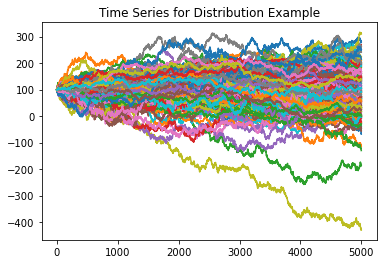

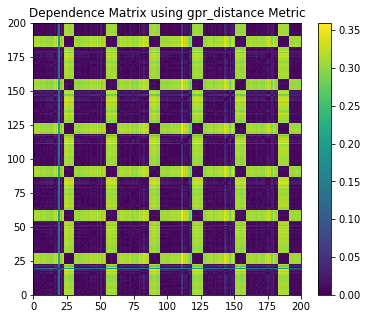

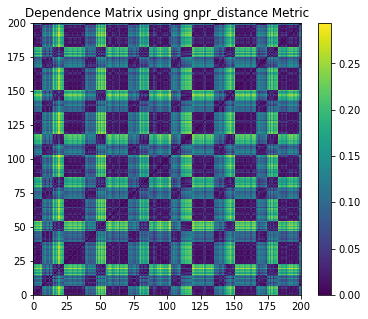

In [4]:
# Plot the time series and codependence matrix for each example.
dataset = generate_cluster_time_series(n_series=n_series, t_samples=t_samples, k_corr_clusters=k_clusters[0],
                                       d_dist_clusters=d_clusters[0], rho_corr=rho_corrs[0],
                                       dists_clusters=dists_clusters[0])
plot_time_series(dataset, title="Distribution", theta=0)

plt.show()

We can appreciate only two apparent clusters are seen with no indication of a global embedded distribution when using the GPR method. All 4 distributions clusters can be seen, as well as the global embedded distribution with the GNPR method.

### Dependence Clustering Generation
The *Dependence* example generates a time series that has a global normal distribution, 10 correlation clusters, and no distribution clusters.

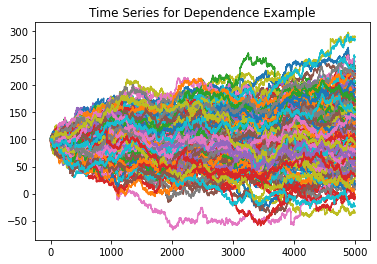

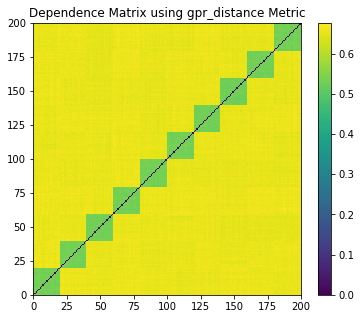

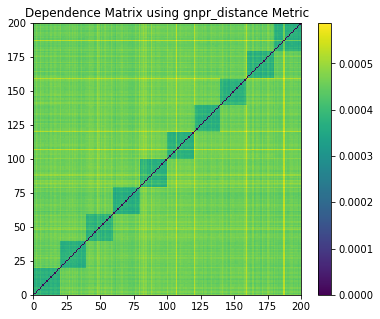

In [5]:
# Plot the time series and codependence matrix for each example.
dataset = generate_cluster_time_series(n_series=n_series, t_samples=t_samples, k_corr_clusters=k_clusters[1],
                                       d_dist_clusters=d_clusters[1], rho_corr=rho_corrs[1],
                                       dists_clusters=dists_clusters[1])
plot_time_series(dataset, title="Dependence", theta=1)

plt.show()

We can appreciate only 10 correlation clusters are seen with no indication of a global embedded distribution when using the GPR method. All 10 correlation clusters can be seen, as well as the global embedded distribution with the GNPR method.


### Mix Clustering Generation
This distribution example can be seen in the original work of the authors. So far we have used a theta ($\theta$) parameter for the GNPR method to be $\theta = 0.5$. This value represents which information to extract from the time series. Depending on its value, it extracts the following information:

- distribution information ($\theta = 0$),

- dependence information ($\theta = 1$)

- a mix of both information ($\theta = 0.5$).

The authors propose that $\theta$ "ideally should reflect a balance o dependence and distribution information in the data". This implies that the $\theta$ value chosen depends on the data being analyzed.

Below we show how the *Mix* time series, that has a global normal distribution, 5 correlation clusters, and 2 distribution clusters, are clustered depending on the $\theta$ value used.

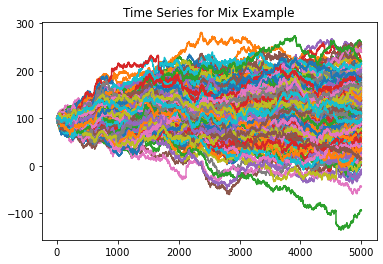

In [6]:
dataset = generate_cluster_time_series(n_series=n_series, t_samples=t_samples, k_corr_clusters=k_clusters[2],
                                       d_dist_clusters=d_clusters[2], rho_corr=rho_corrs[2],
                                       dists_clusters=dists_clusters[2])
dataset.plot(legend=None, title="Time Series for {} Example".format("Mix"))
plt.show()

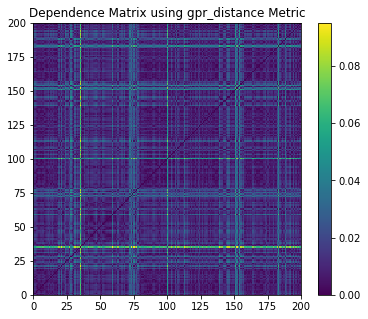

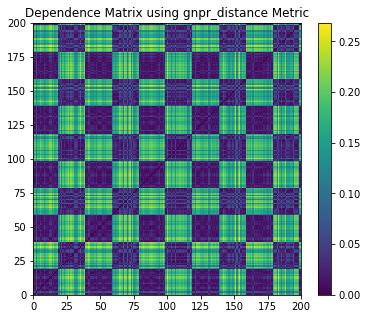

In [7]:
plot_time_series_dependencies(dataset, dependence_method='gpr_distance', theta=0)
plot_time_series_dependencies(dataset, dependence_method='gnpr_distance', theta=0)
plt.show()

When $\theta = 0$ we can see how GPR outputs a matrix which has indistinguishable distributions. GNPR on the other hand, can separate the clusters.

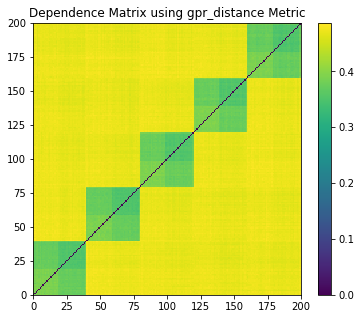

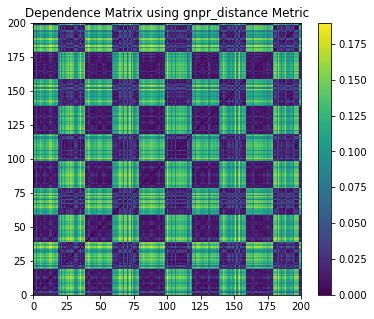

In [8]:
plot_time_series_dependencies(dataset, dependence_method='gpr_distance', theta=0.5)
plot_time_series_dependencies(dataset, dependence_method='gnpr_distance', theta=0.5)
plt.show()


We can appreciate only 5 correlation clusters are seen with no indication of a global embedded distribution when using the GPR method with $\theta = 0.5$. All 5 correlation clusters and 2 distribution clusters can be seen, as well as the global embedded distribution with the GNPR method.



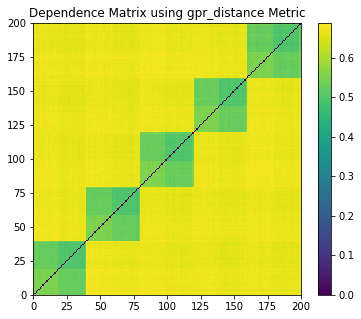

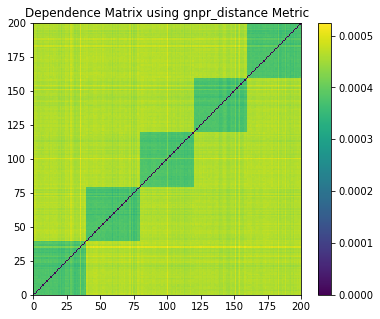

In [9]:
plot_time_series_dependencies(dataset, dependence_method='gpr_distance', theta=1)
plot_time_series_dependencies(dataset, dependence_method='gnpr_distance', theta=1)
plt.show()

When $\theta = 1$ both GPR and GNPR have trouble separating all clusters, but we can clearly see at least the 5 correlation clusters.

### Conclusion

In this notebook, we showed how to use our mlfinlab package to generate synthetic time series that are represented by multiple underlying distributions, and how to use the GNPR method to detect these underlying distributions and separate them into clusters.
We found that:

1. We can generate multiple time series defined as $N$ time series, each of length $T$, which are subdivided into $K$ correlation clusters, themselves subdivided into $D$ distribution clusters.
2. Traditional methods to measure similarities in random variables such as the GPR method are not able to consistently  separate all distributions in the time series.
3. The GNPR method is able to consistently  separate the clusters or distributions, as long as the correct $\theta$ parameter is chosen.

[references]: #references
## References
1. [Donnat, P., Marti, G. and Very, P., 2016. Toward a generic representation of random variables for machine learning. *Pattern Recognition Letters, 70*, pp.24-31.](https://arxiv.org/pdf/1506.00976.pdf)